In [1]:
import tensorflow as tf


In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

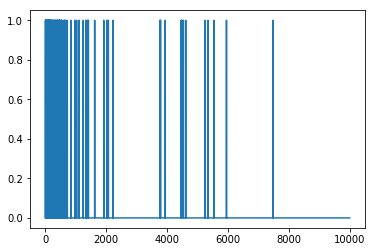

In [4]:
plt.plot(train_data[0])

In [5]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4706 - acc: 0.8223 - binary_crossentropy: 0.4706 - val_loss: 0.3312 - val_acc: 0.8774 - val_binary_crossentropy: 0.3312
Epoch 2/20
 - 5s - loss: 0.2439 - acc: 0.9143 - binary_crossentropy: 0.2439 - val_loss: 0.2833 - val_acc: 0.8866 - val_binary_crossentropy: 0.2833
Epoch 3/20
 - 5s - loss: 0.1791 - acc: 0.9376 - binary_crossentropy: 0.1791 - val_loss: 0.2906 - val_acc: 0.8835 - val_binary_crossentropy: 0.2906
Epoch 4/20
 - 5s - loss: 0.1430 - acc: 0.9515 - binary_crossentropy: 0.1430 - val_loss: 0.3175 - val_acc: 0.8794 - val_binary_crossentropy: 0.3175
Epoch 5/20
 - 5s - loss: 0.1187 - acc: 0.9609 - binary_crossentropy: 0.1187 - val_loss: 0.3451 - val_acc: 0.8732 - val_binary_crossentropy: 0.3451
Epoch 6/20
 - 5s - loss: 0.0974 - acc: 0.9697 - binary_crossentropy: 0.0974 - val_loss: 0.3781 - val_acc: 0.8685 - val_binary_crossentropy: 0.3781
Epoch 7/20
 - 5s - loss: 0.0796 - acc: 0.9771 - binary_crossentropy:

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6094 - acc: 0.7376 - binary_crossentropy: 0.6094 - val_loss: 0.5169 - val_acc: 0.8430 - val_binary_crossentropy: 0.5169
Epoch 2/20
 - 5s - loss: 0.4204 - acc: 0.8762 - binary_crossentropy: 0.4204 - val_loss: 0.3827 - val_acc: 0.8700 - val_binary_crossentropy: 0.3827
Epoch 3/20
 - 5s - loss: 0.3079 - acc: 0.9012 - binary_crossentropy: 0.3079 - val_loss: 0.3211 - val_acc: 0.8815 - val_binary_crossentropy: 0.3211
Epoch 4/20
 - 5s - loss: 0.2480 - acc: 0.9178 - binary_crossentropy: 0.2480 - val_loss: 0.2951 - val_acc: 0.8862 - val_binary_crossentropy: 0.2951
Epoch 5/20
 - 5s - loss: 0.2116 - acc: 0.9283 - binary_crossentropy: 0.2116 - val_loss: 0.2857 - val_acc: 0.8868 - val_binary_crossentropy: 0.2857
Epoch 6/20
 - 5s - loss: 0.1856 - acc: 0.9381 - binary_crossentropy: 0.1856 - val_loss: 0.2820 - val_acc: 0.8878 - val_binary_crossentropy: 0.2820
Epoch 7/20
 - 5s - loss: 0.1657 - acc: 0.9467 - binary_crossentropy:

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 13s - loss: 0.3455 - acc: 0.8536 - binary_crossentropy: 0.3455 - val_loss: 0.2929 - val_acc: 0.8816 - val_binary_crossentropy: 0.2929
Epoch 2/20
 - 12s - loss: 0.1369 - acc: 0.9496 - binary_crossentropy: 0.1369 - val_loss: 0.3538 - val_acc: 0.8642 - val_binary_crossentropy: 0.3538
Epoch 3/20
 - 12s - loss: 0.0440 - acc: 0.9877 - binary_crossentropy: 0.0440 - val_loss: 0.4306 - val_acc: 0.8701 - val_binary_crossentropy: 0.4306
Epoch 4/20
 - 12s - loss: 0.0067 - acc: 0.9991 - binary_crossentropy: 0.0067 - val_loss: 0.5659 - val_acc: 0.8708 - val_binary_crossentropy: 0.5659
Epoch 5/20
 - 12s - loss: 8.0024e-04 - acc: 1.0000 - binary_crossentropy: 8.0024e-04 - val_loss: 0.6584 - val_acc: 0.8699 - val_binary_crossentropy: 0.6584
Epoch 6/20
 - 12s - loss: 2.2770e-04 - acc: 1.0000 - binary_crossentropy: 2.2770e-04 - val_loss: 0.6982 - val_acc: 0.8700 - val_binary_crossentropy: 0.6982
Epoch 7/20
 - 12s - loss: 1.3954e-04 - acc: 1.

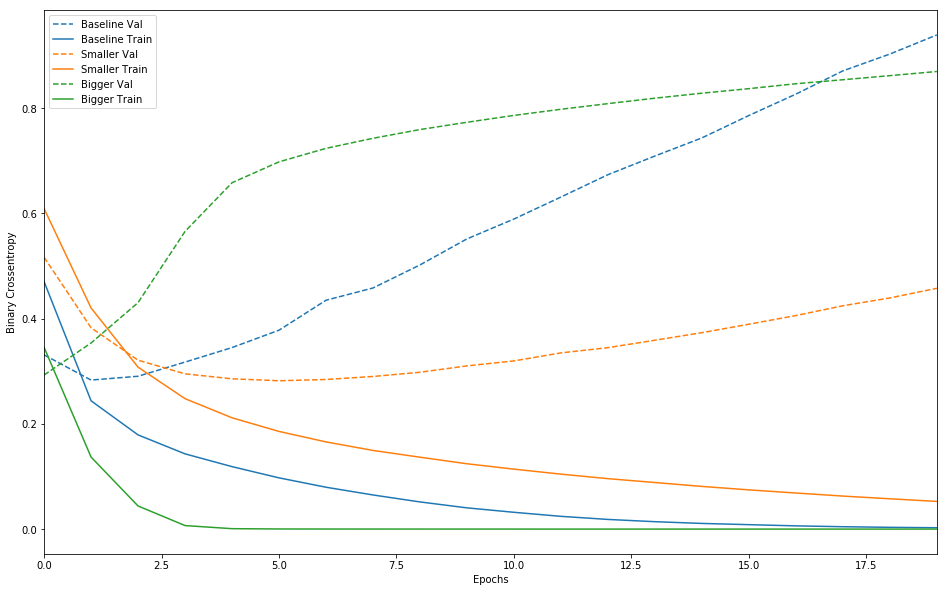

In [11]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [15]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
    activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
    activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [18]:
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data,test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.5531 - acc: 0.8040 - binary_crossentropy: 0.5139 - val_loss: 0.4070 - val_acc: 0.8722 - val_binary_crossentropy: 0.3666
Epoch 2/20
 - 5s - loss: 0.3255 - acc: 0.9024 - binary_crossentropy: 0.2795 - val_loss: 0.3394 - val_acc: 0.8878 - val_binary_crossentropy: 0.2891
Epoch 3/20
 - 5s - loss: 0.2676 - acc: 0.9233 - binary_crossentropy: 0.2145 - val_loss: 0.3370 - val_acc: 0.8870 - val_binary_crossentropy: 0.2818
Epoch 4/20
 - 5s - loss: 0.2406 - acc: 0.9366 - binary_crossentropy: 0.1836 - val_loss: 0.3458 - val_acc: 0.8854 - val_binary_crossentropy: 0.2878
Epoch 5/20
 - 5s - loss: 0.2258 - acc: 0.9426 - binary_crossentropy: 0.1661 - val_loss: 0.3594 - val_acc: 0.8803 - val_binary_crossentropy: 0.2989
Epoch 6/20
 - 5s - loss: 0.2122 - acc: 0.9488 - binary_crossentropy: 0.1509 - val_loss: 0.3721 - val_acc: 0.8775 - val_binary_crossentropy: 0.3104
Epoch 7/20
 - 5s - loss: 0.2047 - acc: 0.9520 - binary_crossentropy:

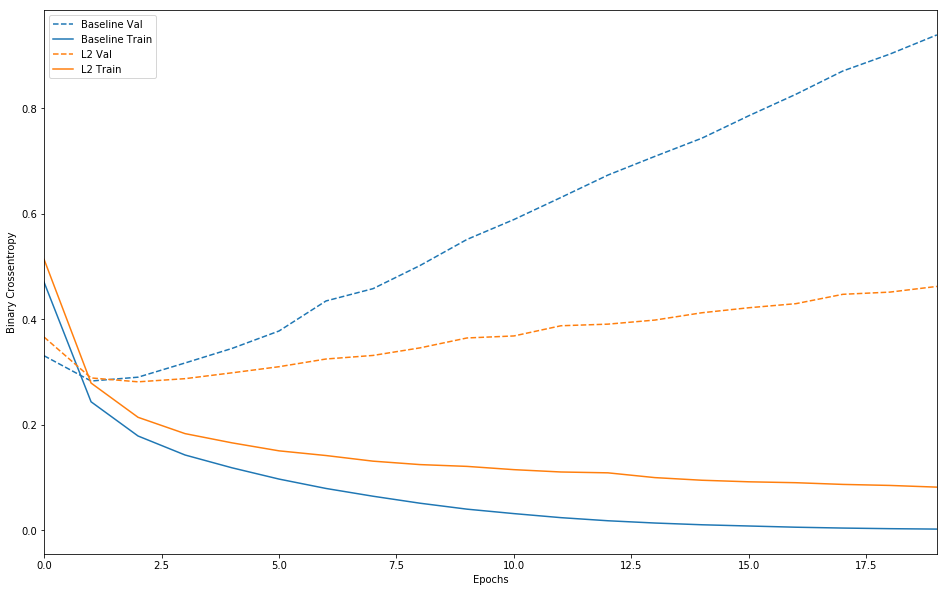

In [22]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [19]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)



Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6455 - acc: 0.6069 - binary_crossentropy: 0.6455 - val_loss: 0.5223 - val_acc: 0.8467 - val_binary_crossentropy: 0.5223
Epoch 2/20
 - 5s - loss: 0.4928 - acc: 0.7779 - binary_crossentropy: 0.4928 - val_loss: 0.3757 - val_acc: 0.8798 - val_binary_crossentropy: 0.3757
Epoch 3/20
 - 5s - loss: 0.3811 - acc: 0.8508 - binary_crossentropy: 0.3811 - val_loss: 0.3048 - val_acc: 0.8870 - val_binary_crossentropy: 0.3048
Epoch 4/20
 - 5s - loss: 0.3147 - acc: 0.8860 - binary_crossentropy: 0.3147 - val_loss: 0.2823 - val_acc: 0.8889 - val_binary_crossentropy: 0.2823
Epoch 5/20
 - 5s - loss: 0.2662 - acc: 0.9095 - binary_crossentropy: 0.2662 - val_loss: 0.2740 - val_acc: 0.8884 - val_binary_crossentropy: 0.2740
Epoch 6/20
 - 5s - loss: 0.2270 - acc: 0.9238 - binary_crossentropy: 0.2270 - val_loss: 0.2858 - val_acc: 0.8872 - val_binary_crossentropy: 0.2858
Epoch 7/20
 - 5s - loss: 0.2007 - acc: 0.9355 - binary_crossentropy:

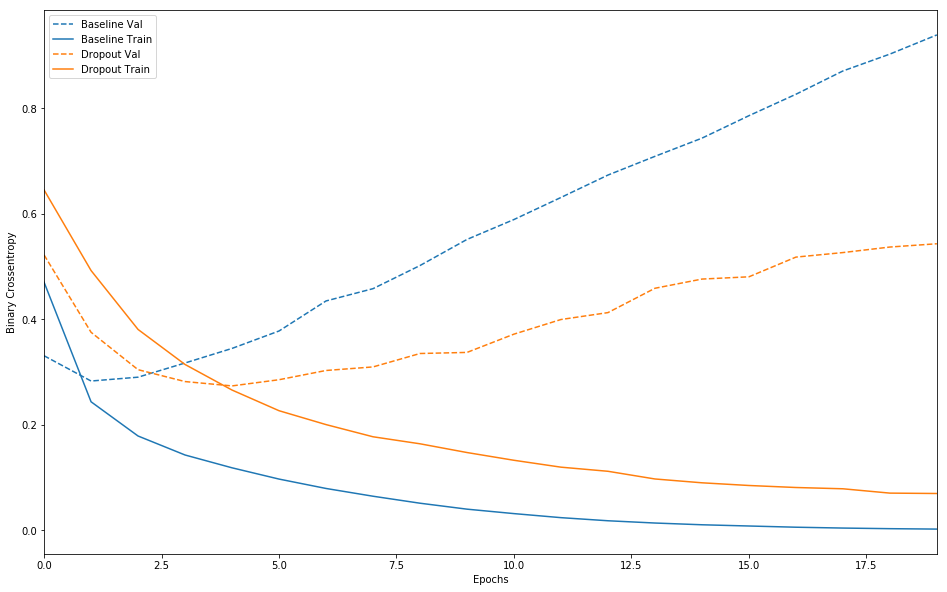

In [21]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])


In [ ]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

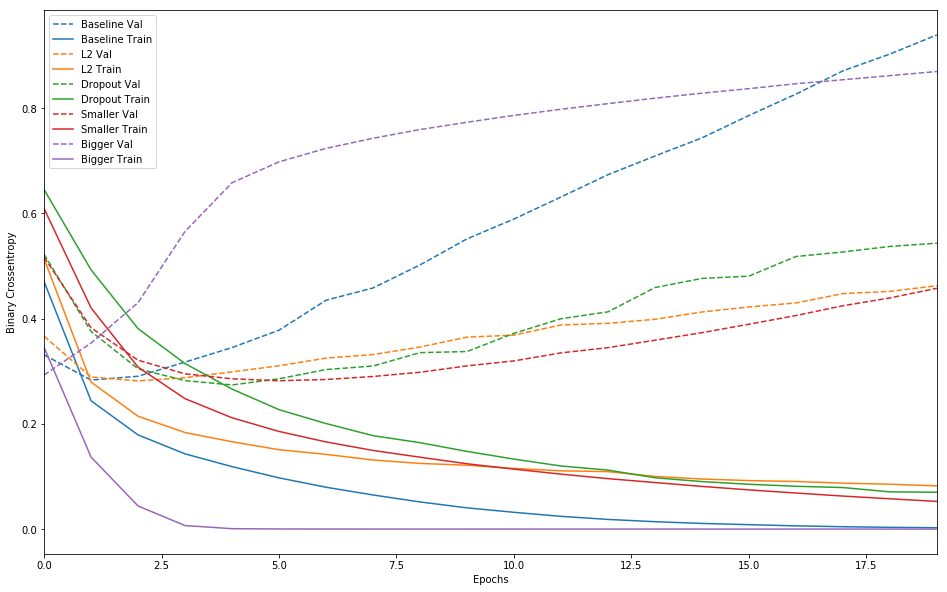

In [24]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history),
              ('dropout', dpt_model_history),
             ('smaller', smaller_history),
              ('bigger', bigger_history)])